In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old = pd.read_table('isochrones/cmd_synt.13000.Fe-1.0.dat', skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
old.head()

,0,1
0,4.71136,0.56505
1,3.94420,0.51366
2,1.41247,-0.05395
3,5.07772,0.61336
4,5.07172,0.60758


In [3]:
young = pd.read_table('isochrones/cmd_synt.3000.Fe-2.3.dat', skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
young.head()

,0,1
0,4.33105,0.44937
1,3.31389,0.26715
2,2.16792,-0.12057
3,4.89255,0.53584
4,4.90654,0.53528


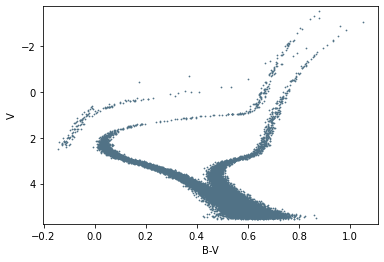

In [4]:
def plotCMD(cmd):
    color = cmd.iloc[:,1]
    magnitude = cmd.iloc[:,0]
    plt.scatter(color, magnitude, s = 0.5535, color = "#517286")
    plt.ylim([magnitude.max()+0.2, magnitude.min()-0.2])
    plt.xlabel("B-V")
    plt.ylabel("V")
    
plotCMD(old)
plotCMD(young)
plt.show()

In [44]:
def mix_CMDs(files, n_to_sample):
    cmd = None
    for f, n in zip(files, n_to_sample):
        if cmd is not None:
            newcmd = pd.read_table(f, skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
            newcmd = newcmd.iloc[np.random.choice(range(newcmd.shape[0]), n),:]
            cmd = pd.concat([cmd, newcmd])
        if cmd is None:
            newcmd = pd.read_table(f, skiprows = 4, header = None, sep = '\s+', usecols=[0,1])
            cmd = newcmd.iloc[np.random.choice(range(newcmd.shape[0]), n),:]
    return cmd

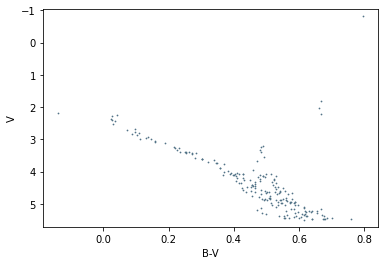

0.5701314059886825
0.292958929224222


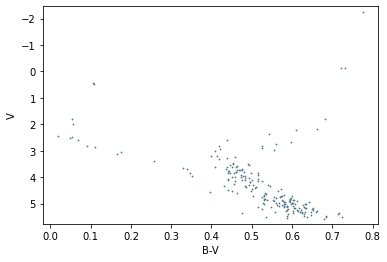

In [48]:
import mistree as mist #use pavia00
import warnings
warnings.filterwarnings('ignore') #should understand instead

def sta(u):
    u = (u - u.mean())/u.std()
    return u

somemix = mix_CMDs(['isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-2.3.dat'], [80, 120])
plotCMD(somemix)
plt.show()

x = sta(somemix.iloc[:,0].to_numpy())
y = sta(somemix.iloc[:,1].to_numpy())
mst = mist.GetMST(x=x, y=y)
d, l, b, s = mst.get_stats()
print(np.median(l)/np.quantile(l, 0.9)) #ratio of median edge length to 90th percentile edge length

someothermix = mix_CMDs(['isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.11000.Fe-1.0.dat', 'isochrones/cmd_synt.7000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-2.3.dat'], [40,60,55,45])
x = sta(someothermix.iloc[:,0].to_numpy())
y = sta(someothermix.iloc[:,1].to_numpy())
mst = mist.GetMST(x=x, y=y)
d, l, b, s = mst.get_stats()
print(np.median(l)/np.quantile(l, 0.9)) #ratio of median edge length to 90th percentile edge length

plotCMD(someothermix)
plt.show()


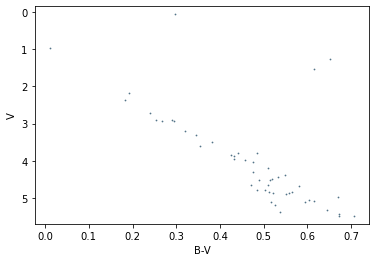

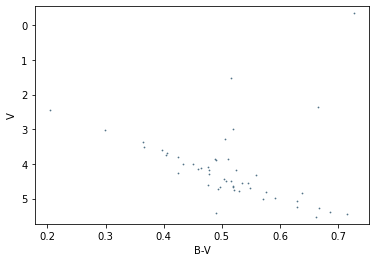

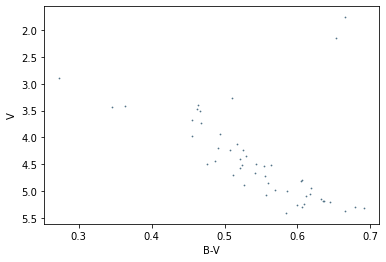

In [50]:
def mix_CMDs_proportional(CMD0, CMD1, alpha):
    mixed_CMD = mix_CMDs([CMD0, CMD1], [int(np.round(50*alpha)), int(np.round((1-alpha)*50))])
    return mixed_CMD

plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.1))
plt.show()
plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.5))
plt.show()
plotCMD(mix_CMDs_proportional('isochrones/cmd_synt.13000.Fe-1.0.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', 0.9))
plt.show()


[[0.06143159 0.08071327 0.09687694 0.1127309  0.15604716 0.17755382
  0.19878842 0.22479923 0.36917801]
 [0.04115401 0.06925395 0.08060182 0.10188561 0.12665199 0.14879901
  0.17804313 0.21290927 0.32974679]
 [0.05577712 0.06901155 0.09413586 0.13556378 0.17002541 0.18997914
  0.21476983 0.26196352 0.3968463 ]
 [0.0357416  0.06842829 0.09954016 0.11174772 0.13266479 0.18164776
  0.23349824 0.2843878  0.49756218]
 [0.0714313  0.08095678 0.097238   0.11083723 0.13008907 0.1485968
  0.22182471 0.25270193 0.57027484]
 [0.03653041 0.05178604 0.07634602 0.09767748 0.11488423 0.16912748
  0.21227509 0.23090116 0.29796823]
 [0.06760734 0.10051676 0.13070731 0.15357846 0.18142466 0.21592831
  0.28209933 0.36423294 0.52368917]
 [0.08475414 0.10886824 0.14057599 0.16415703 0.1858196  0.21472227
  0.25415427 0.29279403 0.43207993]
 [0.04714918 0.07454917 0.09500655 0.11702716 0.15149197 0.19370545
  0.22980381 0.27117585 0.33440272]
 [0.05482919 0.08067417 0.09857393 0.13935219 0.16664721 0.188831

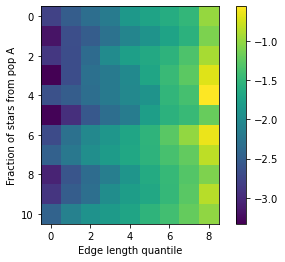

In [52]:
def MST_of_a_mix(CMD0, CMD1, alpha):
    thismix = mix_CMDs_proportional(CMD0, CMD1, alpha)
    mst = mist.GetMST(x=sta(thismix.iloc[:,0].to_numpy()), y=sta(thismix.iloc[:,1].to_numpy()))
    d, l, b, s = mst.get_stats()
    lq = np.quantile(l, (1+np.arange(9))/10)
    return(lq)

MSTs = []
for alpha in np.arange(11)/10:
    MSTs.append(MST_of_a_mix('isochrones/cmd_synt.13000.Fe-2.3.dat', 'isochrones/cmd_synt.3000.Fe-1.0.dat', alpha))

    
print(np.array(MSTs))

plt.imshow(np.log(np.array(MSTs)))
plt.xlabel("Edge length quantile")
plt.ylabel("Fraction of stars from pop A")
plt.colorbar()
plt.show()